## Commodity Data Exploration and Analysis

In this file I will perform some data exploration and analysis of the commodity data

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

commodity_set = pd.read_csv('C://commodity_list.csv', header=None)
county_set = pd.read_csv('C://counties.csv', header=None)
population_set = pd.read_csv('C://maryland_population.csv', header=0)

### Location/County Data

In [129]:
county_set.groupby(4).size()

4
3                          1
Allegany County            4
Anne Arundel County       19
Baltimore City            22
Baltimore County          42
Calvert County            11
Caroline County            8
Carroll County            26
Cecil County              10
Charles County             8
Dorchester County          5
Frederick County          30
Garrett County             7
Harford County            19
Howard County             13
Kent County                6
Montgomery County         32
New Castle County          1
Prince George's County    24
Queen Anne's County       14
Somerset County            2
St. Mary's County          6
Talbot County              7
Washington County         17
Wicomico County            8
Worcester County           6
dtype: int64

Interestingly, a single Delaware entry was included- from New Castle County. There are at least two records from every Maryland jurisdiction though.

In [130]:
county_set[(county_set[4] == 'New Castle County')]

,0,1,2,3,4
34,33.0,34,"Rt 40 & 896, Bear, DE \n","39.6056676, -75.74132559999998",New Castle County


In [131]:
commodity_set.groupby(commodity_set.iloc[34,:]).size()

34
35            1
Vegetables    1
dtype: int64

Because the record is not in the target group, and also because it does not contain commodity data that is very useful- only "Vegetables" is listed as a commodity- the Delaware record will be removed.

In [132]:
county_set = county_set.drop(county_set.index[[34]])
commodity_set = commodity_set.drop(commodity_set.index[[34]])

In [133]:
county_group = county_set.groupby(4).size()
county_group = county_group.drop(county_group.index[[0]])

<AxesSubplot:xlabel='4'>

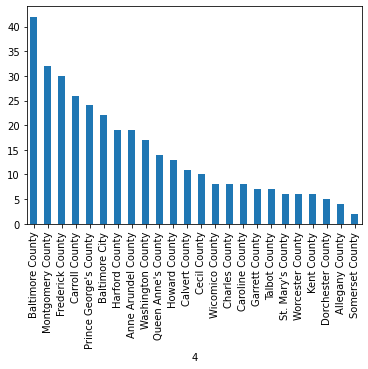

In [134]:
county_group.sort_values(ascending = False).plot(kind = 'bar', x = 0, y = 1)

#### Commodity Records by Jurisdiction

Just by the distribution of records by county there appears to be a variation based on population, but the spread of commodity records appears to have a more even spread than that of the State's population. Population per county data from the [Maryland Department of Planning](https://planning.maryland.gov/MSDC/Pages/pop_estimate/popest_cnty.aspx) is shown below.

<AxesSubplot:xlabel=' State/Jurisdiction '>

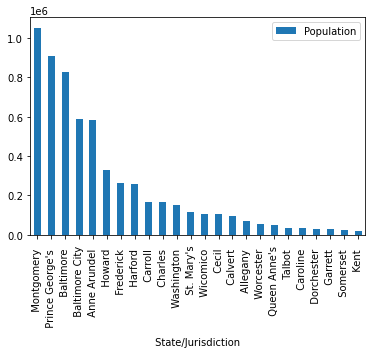

In [140]:
population_set.sort_values(by = 'Population', ascending = False).plot(kind = 'bar', x = 0, y = 1)

#### Population by Jurisdiction

### Commodity Count Exploration

In [8]:
# Drop the ID column
commodity_set = commodity_set.drop([0], axis = 1)

How many unique item entries exist?

In [109]:
commodity_dict = dict()
for i, j in commodity_set.iterrows():
        for x in j:
            if pd.notna(x):
                temp = x
                commodity_dict[temp] = commodity_dict.get(temp, 0) + 1

In [11]:
len(commodity_dict)

178

In [110]:
# Convert the dictionary to a dataframe
commodity_df = pd.DataFrame(list(commodity_dict.items()),columns = ['commodity','count']) 

In [111]:
commodity_df.sort_values(by=['count'], ascending = False).head(15)

,commodity,count
11,Conventional,166
20,Vegetables,144
19,Fruits,114
36,Tomatoes,77
48,Cucumbers,72
55,Green-peppers,71
65,Squash,67
70,Zucchini,64
67,Sweet-peppers,63
50,Eggplant,60


Although there are 178 unique items, not all of them have much value- the most common being 'Conventional', 'Vegetables', and 'Fruits.

<AxesSubplot:xlabel='commodity'>

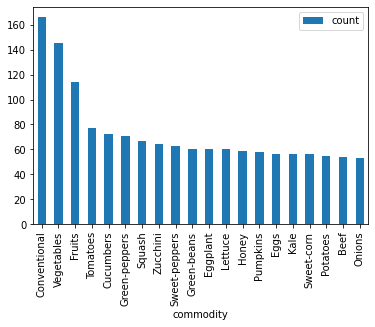

In [33]:
commodity_df.sort_values(by=['count'], ascending = False).head(20).plot(kind = 'bar', x = 'commodity', y = 'count')

In [42]:
np.mean(commodity_df['count'])

24.00561797752809

In [41]:
np.std(commodity_df['count'])

25.089614036155936

{'whiskers': [<matplotlib.lines.Line2D at 0x3abfefd490>,
 'caps': [<matplotlib.lines.Line2D at 0x3abfefdeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x3abfefd760>],
 'medians': [<matplotlib.lines.Line2D at 0x3abff09b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x3abff09610>],
 'means': []}

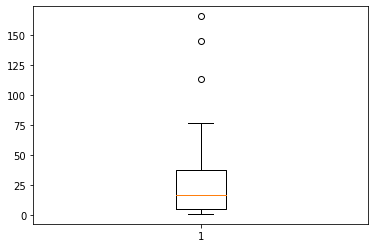

In [44]:
plt.boxplot(commodity_df['count'])

There is a fairly wide spread of commodity counts, discounting the aforementioned top three.